In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from unidecode import unidecode

In [2]:
#importing und visulizing the dataset:
covid_df=pd.read_csv('covid_19_india.csv')
covid_df.head()

,Unnamed: 0,Date,State/UT,Latitude,Longitude,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
0,0,2020/01/30,Kerala,10.8505,76.2711,1,1,0,0.0,0,0.0
1,1,2020/01/31,Kerala,10.8505,76.2711,1,1,0,0.0,0,0.0
2,2,2020/02/01,Kerala,10.8505,76.2711,2,2,0,0.0,0,0.0
3,3,2020/02/02,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
4,4,2020/02/03,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      952 non-null    int64  
 1   Date            952 non-null    object 
 2   State/UT        952 non-null    object 
 3   Latitude        952 non-null    float64
 4   Longitude       952 non-null    float64
 5   Confirmed       952 non-null    int64  
 6   Active          952 non-null    int64  
 7   Deaths          952 non-null    int64  
 8   Mortality rate  950 non-null    float64
 9   Cured           952 non-null    int64  
 10  Recovery rate   950 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 81.9+ KB


In [4]:
#looking at the columns of this dataset:
print(covid_df.columns.tolist())

['Unnamed: 0', 'Date', 'State/UT', 'Latitude', 'Longitude', 'Confirmed', 'Active', 'Deaths', 'Mortality rate', 'Cured', 'Recovery rate']


In [5]:
#droping unneeded columns:
covid_df.drop(['Unnamed: 0','Latitude', 'Longitude','Mortality rate','Recovery rate'], inplace= True, axis=1)


In [6]:
covid_df.tail(10)

,Date,State/UT,Confirmed,Active,Deaths,Cured
942,2020/04/15,Odisha,60,41,1,18
943,2020/04/15,Puducherry,7,6,0,1
944,2020/04/15,Punjab,176,150,12,14
945,2020/04/15,Rajasthan,969,819,3,147
946,2020/04/15,Tamil Nadu,1204,1111,12,81
947,2020/04/15,Telengana,624,507,17,100
948,2020/04/15,Tripura,2,2,0,0
949,2020/04/15,Uttar Pradesh,660,605,5,50
950,2020/04/15,Uttarakhand,37,28,0,9
951,2020/04/15,West Bengal,213,169,7,37


In [7]:
#formating the date column:
covid_df['Date']=pd.to_datetime(covid_df['Date'], errors='coerce', format='%Y%m%d')


In [8]:
#statistical overview of the new dataset:
covid_df.describe()

,Confirmed,Active,Deaths,Cured
count,952.000000,952.000000,952.000000,952.000000
mean,88.147059,78.030462,2.540966,7.575630
std,217.505810,191.942421,11.122225,22.111812
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000
50%,13.000000,11.000000,0.000000,0.000000
75%,55.000000,50.000000,1.000000,5.000000
max,2687.000000,2250.000000,178.000000,259.000000


In [9]:
#creating a pivot table to show the no. of  Active, deths and cured cases for each state
statewise=pd.pivot_table(covid_df, values=['Confirmed', 'Deaths', 'Cured','Active'], index= 'State/UT', aggfunc= max)


In [10]:
# recalculating the confirmed cases, recovery rate and mortality rate and adding them to the pivot table:

statewise['Recovery rate']= statewise['Cured']*100/statewise['Confirmed']
statewise['Mortality rate']=statewise['Deaths']*100/statewise['Confirmed']

In [11]:
#sorting the pivot table by the confirmed cases:
statewise=statewise.sort_values(by='Confirmed', ascending= False)

In [12]:
#ploting the pivot table using colormap from the matplotlib library:
statewise.style.background_gradient(cmap='cubehelix')

,Active,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UT,,,,,,
Maharashtra,2250,2687,259,178,9.639003,6.624488
Delhi,1501,1561,30,30,1.921845,1.921845
Tamil Nadu,1111,1204,81,12,6.727575,0.996678
Rajasthan,819,969,147,3,15.170279,0.309598
Madhya Pradesh,629,730,51,50,6.986301,6.849315
Uttar Pradesh,605,660,50,5,7.575758,0.757576
Gujarat,563,650,59,28,9.076923,4.307692
Telengana,507,624,100,17,16.025641,2.724359
Andhra Pradesh,458,483,16,9,3.312629,1.863354


In [13]:
#visulizing the top 10 states based on the number of active cases:
top_10_activestates=covid_df.groupby(by='State/UT',dropna=False).max()[['Active','Date']].sort_values(by=['Active'], ascending=False).reset_index()
top_10_activestates.tail()

,State/UT,Active,Date
28,Tripura,2,NaT
29,Mizoram,1,NaT
30,Meghalaya,1,NaT
31,Arunachal Pradesh,1,NaT
32,Nagaland,0,NaT


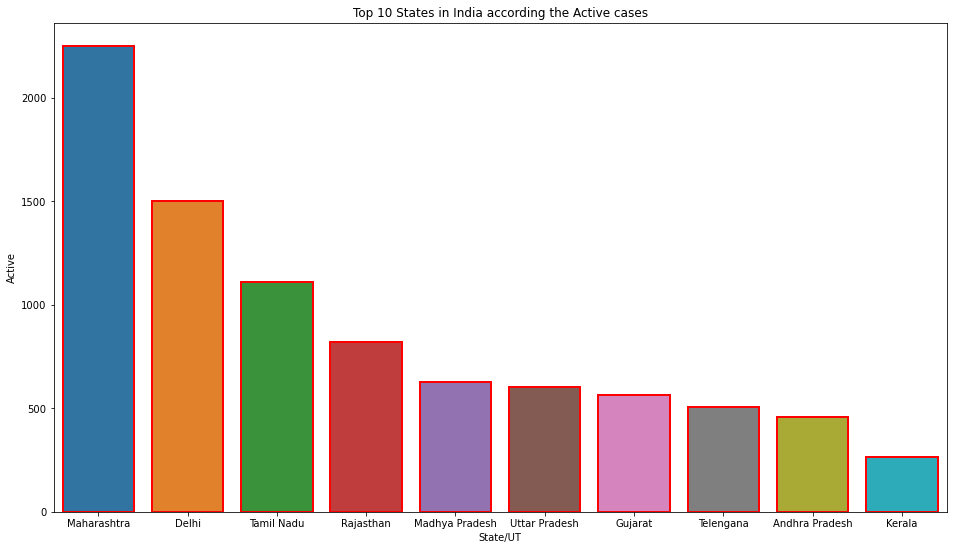

In [14]:
#visulizing the top 10 states based on the number of active cases:
top_10_activestates=covid_df.groupby(by='State/UT').max()[['Active','Date']].sort_values(by=['Active'], ascending=False).reset_index()


#barplot of the data in top_10_activestates:
fig= plt.figure(figsize= (16,9))
plt.title('Top 10 States in India according the Active cases')
#bar plot using seaborn library
ax=sns.barplot(data=top_10_activestates.iloc[:10], y='Active', x='State/UT',linewidth=2,edgecolor='red' )

plt.xlabel('State/UT')
plt.ylabel('Active')
plt.show()

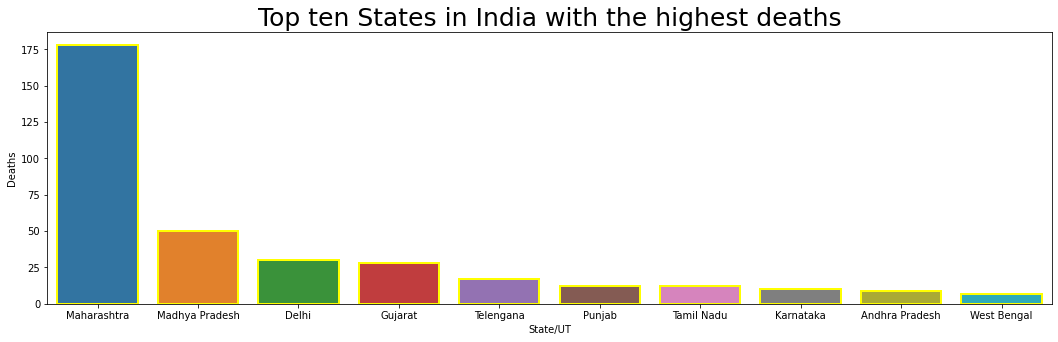

In [15]:
#graph that shows top 10 deaths
top_10_deaths=covid_df.groupby(by='State/UT').max()[['Deaths','Date']].sort_values(by=['Deaths'], ascending=False).reset_index()
fig2=plt.figure(figsize=(18,5))
plt.title('Top ten States in India with the highest deaths', size=25)

axe=sns.barplot(data=top_10_deaths.iloc[:10] ,y='Deaths', x='State/UT',linewidth=2,edgecolor='yellow')

plt.xlabel('State/UT')
plt.ylabel('Deaths')
plt.show()

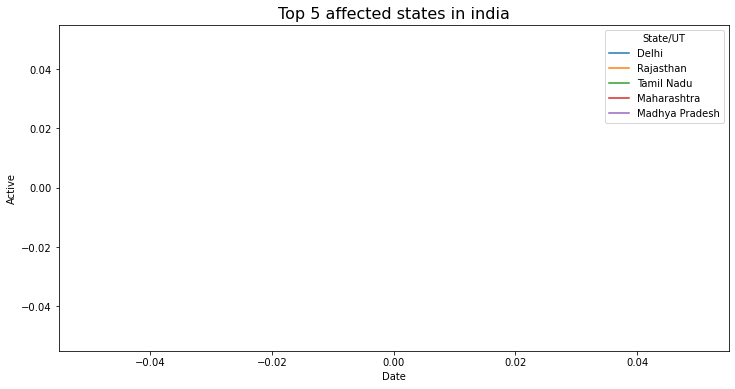

In [22]:
#line graph shows the growth of the active cases in the top 5 states:
#note: hue arrg. is used to give each state different color

fig= plt.figure(figsize= (12,6))

axi=sns.lineplot(x=covid_df['Date'],y=covid_df['Active'],data=covid_df[covid_df['State/UT'].isin(['Maharashtra','Delhi','Tamil Nadu','Rajasthan','Madhya Pradesh'])], hue='State/UT')

axi.set_title('Top 5 affected states in india', size=16)

plt.xlabel('Date')
plt.ylabel('Active')
plt.show()